# Math Wizard

## Math Symbols - Image data to Numpy

### Import Libraries

In [1]:
import os
import json

from PIL import Image
from PIL import ImageOps

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

### Check if Numpy dataset available
- Load if already available
- Convert Image to Numpy and save to compressed pkl file if not available

In [2]:
BASE_DIR = 'dataset/math-symbols-np'
dataset_path = 'dataset/math-symbols'
dataset_np_file = os.path.join(BASE_DIR, 'math_symbols')
dataset_np_file_saved = dataset_np_file + '.npz'
dataset_index_label_map = os.path.join(BASE_DIR, 'index_label_map.json')

In [3]:
if not os.path.exists(BASE_DIR):
    os.makedirs(BASE_DIR)

In [4]:
def is_dataset_np_available():
    if os.path.isfile(dataset_np_file_saved):
        return True
    return False

### Symbols

c:\users\aditya\venv\python3-gpu\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


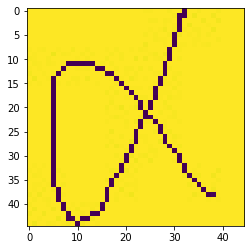

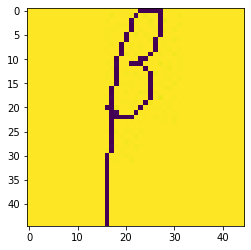

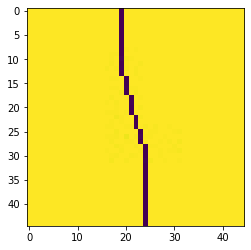

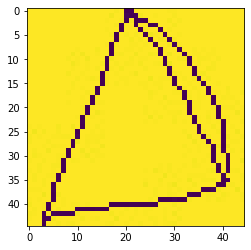

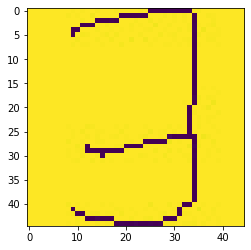

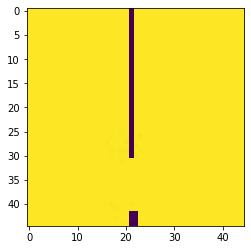

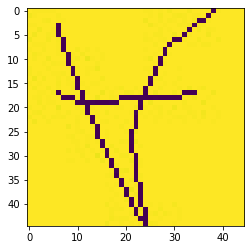

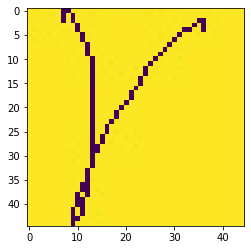

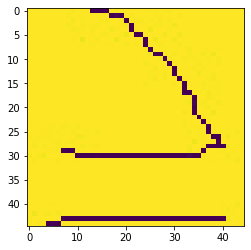

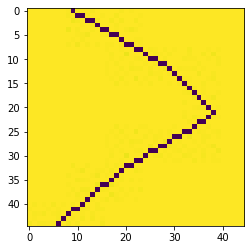

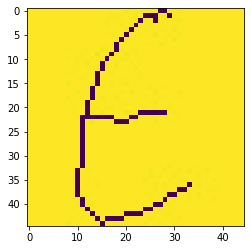

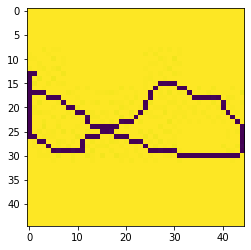

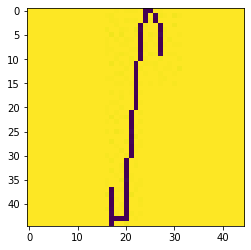

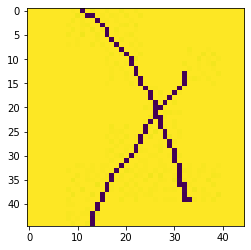

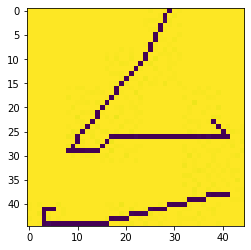

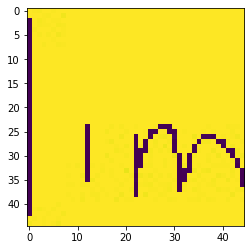

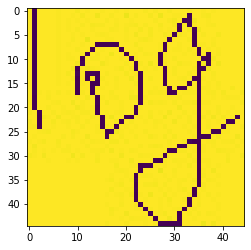

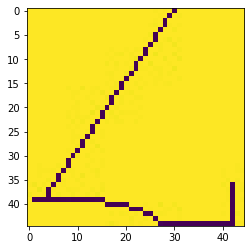

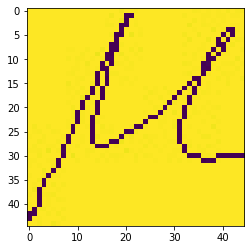

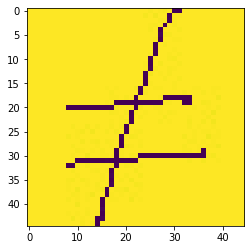

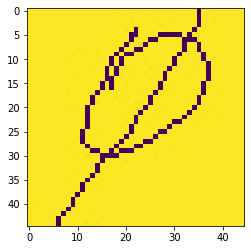

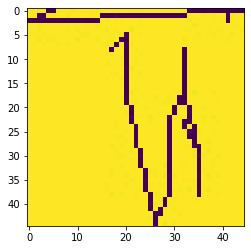

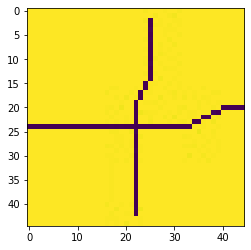

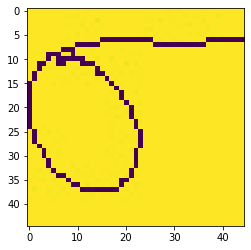

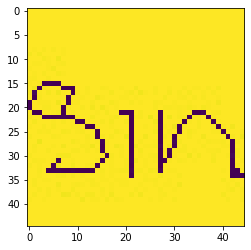

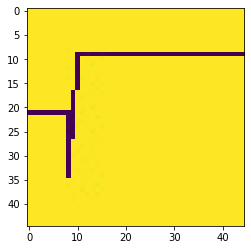

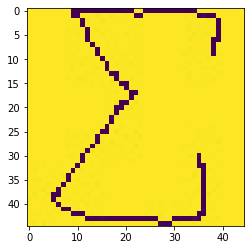

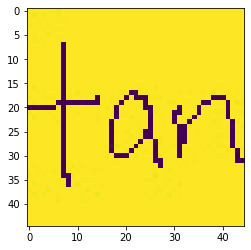

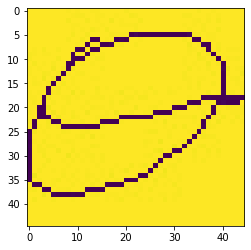

In [5]:
for single_dir in os.listdir(dataset_path):
    all_images = os.listdir(os.path.join(dataset_path, single_dir))
    single_image_path = os.path.join(dataset_path, single_dir, all_images[0])
    pil_im = Image.open(single_image_path, 'r')
    plt.figure()
    plt.imshow(pil_im)

In [6]:
def get_label_index_map():
    label_index_map = {}
    index_label_map = {}
    index = 0
    for dir_name in os.listdir(dataset_path):
        label_index_map[dir_name] = index
        index_label_map[index] = dir_name
        index += 1
    return label_index_map, index_label_map

In [7]:
label_index_map, index_label_map = get_label_index_map()

In [8]:
def save_index_label_map():
    with open(dataset_index_label_map, 'w') as fp:
        json.dump(index_label_map, fp)

In [9]:
save_index_label_map()

In [10]:
def convert_image_to_np_dataset():
    symbols_dir_list = os.listdir(dataset_path)

    math_symbols_images = []
    math_symbols_lables = []
    new_image_size = 28, 28
    
    for symbol_dir_name in symbols_dir_list:
        symbol_dir_path = os.path.join(dataset_path, symbol_dir_name)
        symbol_dataset_list = os.listdir(symbol_dir_path)
        for symbol_img_name in symbol_dataset_list:
            symbol_img_path = os.path.join(symbol_dir_path, symbol_img_name)
            symbol_img = Image.open(symbol_img_path)
            symbol_img_inv = ImageOps.invert(symbol_img)
            symbol_img_inv.thumbnail(new_image_size, Image.ANTIALIAS)
            symbol_img_np = np.array(symbol_img_inv)
            math_symbols_images.append(symbol_img_np)
            math_symbols_lables.append(symbol_dir_name)

    math_symbols_images_np = np.array(math_symbols_images)
    
    math_symbols_lables_le = [label_index_map[letter] for letter in math_symbols_lables]
    math_symbols_labels_np = np.array(math_symbols_lables_le)

    math_symbols_images_np.shape
    math_symbols_labels_np.shape

    plt.figure(figsize=(4, 4))
    plt.imshow(math_symbols_images_np[0], cmap=plt.cm.gray)
    plt.show()

    images_shuflled, label_shuffled = shuffle(math_symbols_images_np, math_symbols_labels_np, random_state=42)

    plt.figure(figsize=(4, 4))
    plt.imshow(images_shuflled[3200], cmap=plt.cm.gray)
    plt.show()

    label_shuffled[3200]
    
    np.savez_compressed(dataset_np_file, image_symbols=images_shuflled, image_labels=label_shuffled)

In [11]:
def load_np_dataset():
    print(dataset_np_file_saved)
    math_symbols_np = np.load(dataset_np_file_saved)
    math_symbols_img = math_symbols_np['image_symbols']
    math_symbols_labels = math_symbols_np['image_labels']

    plt.figure(figsize=(4, 4))
    plt.imshow(math_symbols_img[3200], cmap=plt.cm.gray)
    plt.show()

    print('Size', math_symbols_img[3200].shape)
    print('Label', math_symbols_labels[3200])

In [12]:
if not is_dataset_np_available():
    convert_image_to_np_dataset()

dataset/math-symbols-np\math_symbols.npz


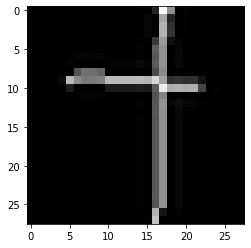

Size (28, 28)
Label 22


In [13]:
load_np_dataset()